In [3]:
import types
import numpy as np
import nltk
import re
import random
import pandas as pd
# from gensim.parsing.porter import PorterStemmer
from nltk.corpus import gutenberg, stopwords
from nltk.probability import FreqDist
from nltk.corpus import words
import matplotlib.pyplot as plt
import requests

from numpy.linalg import norm
# !python -m spacy download en_core_web_sm
# import en_core_web_sm


# load download the data

In [6]:
import string
word = "hospital"
lower_upper_alphabet = string.ascii_letters

for _ in range(1):
  random_letter = random.choice(lower_upper_alphabet)
  i = random.randint(1,len(word))
  word = word[:i] + random_letter.lower() + word[i:]
books=[]
urls=[]

urls.append("https://www.gutenberg.org/files/51660/51660-0.txt")
# urls.append("https://www.gutenberg.org/files/20023/20023-8.txt")
# urls.append("https://www.gutenberg.org/files/36641/36641-8.txt")
# urls.append("https://www.gutenberg.org/files/63444/63444-0.txt")
# urls.append("https://www.gutenberg.org/files/1265/1265.txt")

for url in urls:
  books.append(requests.get(url).text)

# apply error function

In [ ]:
import string

def apply_error(word, remove=0.3, add=0.3, swap_letter=True):
  def swap(s, i, j):
    return ''.join((s[:i], s[j], s[i+1:j], s[i], s[j+1:]))

  if swap_letter:
    i = random.randint(0,len(word)-1)
    j = random.randint(0,len(word)-1)
    word = swap(word, i, j)

  letters_to_remove = int(remove*len(word))
  letters_to_add = int(add*len(word))

  for _ in range(letters_to_remove):
    i = random.randint(1,len(word))
    word = word[:i-1] + word[i:]

  lower_upper_alphabet = string.ascii_letters
  for _ in range(letters_to_add):
    random_letter = random.choice(lower_upper_alphabet)
    i = random.randint(1,len(word))
    word = word[:i] + random_letter.lower() + word[i:]

  return word

def prepare_data(text):
  # to lower case
  text = text.lower()
  
  # Remove non-ascii characters
  text = text.encode("ascii", "ignore").decode()

  # Remove \n and \r
  text = re.sub(r'[\r*\n*]+', ' ', text)

  # Remove websites and hashtags
  text = re.sub(r'_|#|http\S+|www\S+', ' ', text)

  # Substitute numbers by keyword num
  text = re.sub(r'\d+', 'num', text)

  
  # Divide into sentences
  # sents = text_to_sent_list(text, nlp)

  # Apply tokenization
  regex = r"\w+'?\w+\s"
  words = re.findall(regex,text)
  words = [w[:-1] for w in words]
  words = [w for w in words if len(w)>1 or w in ["a", "i"]]

  unique = np.unique(words, return_counts=True)
  [[w, c] for w, c in zip(*unique) if  len(w) == 2]

  return words

words = [prepare_data(book) for book in books]
words = [y for x in words for y in x]


words = set(words)

# multiplication_factor = 3
# for i in range(3):
#   words


In [8]:
correct_words = list(set(prepare_data(books[0])))
my_wrong1 =[]
my_wrong2 =[]
my_wrong3 =[]
my_wrong4 =[]
my_wrong5 =[]
for correct in correct_words:
  
  my_wrong1.append(apply_error(correct, remove=0.1, add=0.1,swap_letter=True))
  my_wrong2.append(apply_error(correct, remove=0.1, add=0.1, swap_letter=True))
  my_wrong3.append(apply_error(correct, remove=0.2, add=0.1))
  my_wrong4.append(apply_error(correct, remove=0.2, add=0.1,swap_letter=True))
  my_wrong5.append(apply_error(correct, remove=0.1, add=0.2,swap_letter=True))
  # print(correct,my_wrong)
  # wrong_data.append(my_wrong)

# prepare data and test 

In [9]:
df = pd.DataFrame({"correct":correct_words,"wrong1":my_wrong1,"wrong2":my_wrong2,"wrong3":my_wrong3,"wrong4":my_wrong4,"wrong5":my_wrong5})
df

,correct,wrong1,wrong2,wrong3,wrong4,wrong5
0,executive,exeuticvutigve,vxecutiee,euecxive,execuive,executjvie
1,returned,rteurned,reternud,rrtened,reurrnetrnedy,retururnneyd
2,org,orogrg,oorrg,oorg,orrg,oorg
3,unmixed,unmixeidxze,uunmixed,nuixed,numnmxerd,unlmixexted
4,hundreds,hunrdeds,huundrpeds,undredusdrxds,hudurzdreds,hedndruds
...,...,...,...,...,...,...
10976,partisans,partissna,aprtisans,palrtianissan,partitdisas,nrartisaps
10977,squires,sqriues,ssqquires,squgirere,squciquies,squsreiq
10978,sheath,saehth,ssheath,sheatt,saeth,shedaetath
10979,colors,ccolors,coloolors,cooorrs,coorss,cocloilors


In [13]:
df.to_csv("correction_test.csv")

In [4]:
df = pd.read_csv("/kaggle/input/correction-test/correction_test.csv",index_col=False)
df.drop(columns = "Unnamed: 0",  inplace = True)
df

,correct,wrong1,wrong2,wrong3,wrong4,wrong5
0,executive,exeuticvutigve,vxecutiee,euecxive,execuive,executjvie
1,returned,rteurned,reternud,rrtened,reurrnetrnedy,retururnneyd
2,org,orogrg,oorrg,oorg,orrg,oorg
3,unmixed,unmixeidxze,uunmixed,nuixed,numnmxerd,unlmixexted
4,hundreds,hunrdeds,huundrpeds,undredusdrxds,hudurzdreds,hedndruds
...,...,...,...,...,...,...
10976,partisans,partissna,aprtisans,palrtianissan,partitdisas,nrartisaps
10977,squires,sqriues,ssqquires,squgirere,squciquies,squsreiq
10978,sheath,saehth,ssheath,sheatt,saeth,shedaetath
10979,colors,ccolors,coloolors,cooorrs,coorss,cocloilors


In [5]:
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10980 entries, 0 to 10980
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   correct  10980 non-null  object
 1   wrong1   10980 non-null  object
 2   wrong2   10980 non-null  object
 3   wrong3   10980 non-null  object
 4   wrong4   10980 non-null  object
 5   wrong5   10980 non-null  object
dtypes: object(6)
memory usage: 600.5+ KB


In [7]:
from numpy.ma.core import empty
max = 5000#len(df)
print(max)
correct_words =df.correct[:max].values

5000


# Create vector the word
the vector is created by adding the frequency of each character in the word at the char position 
the vacor is 26 long = number of character in the English letters

In [8]:
def myWord2vec(word):
    vector  = [0]*26   
    for c in word:
        index = ord(c)-97
        if index>=26 or index <0:
            continue
        vector[index]+=1
    return vector


In [10]:
myWord2vec("your're")

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0]

In [11]:
myWord2vec("aaahmed")

[3, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
myWord2vec("ahamed")

[2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

cosine similarity was later proven to be better than eucledian distance

In [9]:
import numpy as np

 
# define two lists or array
A = np.array(myWord2vec("sendom"))
B = np.array(myWord2vec("sand"))
print("A:\n", A)
print("B:\n", B)
 
# compute cosine similarity
cosine = np.dot(A,B)/(norm(A, axis=0)*norm(B))
print("Cosine Similarity:\n", cosine)

dist = np.linalg.norm(A - B)
print(dist)

A:
 [0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0]
B:
 [1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
Cosine Similarity:
 0.6123724356957946
2.0


In [10]:
def cosin_similarity(word1,word2):
    # print(word1,word2)
    A = np.array(myWord2vec(word1))
    B = np.array(myWord2vec(word2))

    # compute cosine similarity
    cosine = np.dot(A,B)/(norm(A, axis=0)*norm(B))
    return cosine

In [11]:
def get_most_similar(word,metric = cosin_similarity, tolerance = 1):
    matched_word  =[]
    max_s = 0
    myTolearnce = tolerance
    for w in correct_words:
        cos = metric(word,w)
        if cos >= max_s:
            if myTolearnce ==0:
                matched_word.append((cos,w))
                matched_word.sort(key= lambda record:record[0])
                matched_word.pop(0)
                max_s = matched_word[0][0]
                continue
            matched_word.append((cos,w))
            myTolearnce -=1
    matched_word.sort(key= lambda record:record[0],reverse=True)
    return matched_word


In [35]:
import time
start = time.time()
wrong1_performance =[]
num_correct = 0
for i in range(max):
    correct_w = df.iloc[i,0]
    wrong = df.iloc[i,1]
    flag = 0
    matches = get_most_similar(wrong)
    corrected = [x[1] for x in matches]
    for (cos_value,close_matches) in matches:
        if close_matches is not empty and close_matches == correct_w:
            corrected = close_matches
            num_correct+=1
            flag = 1
            break
    wrong1_performance.append((flag, corrected, cos_value))
end = time.time()

In [36]:
report_1 = pd.DataFrame(wrong1_performance, columns = ["flag","close_matches","value"])

report_1["correct"] = correct_words
report_1["wrong1"] = df.iloc[:max,1]
print(num_correct)
print("time = ",end-start)
accuracy_1 = num_correct/max
print("accuracy: ",accuracy_1)

report_1

4525
time =  620.7690420150757
accuracy:  0.905


,flag,close_matches,value,correct,wrong1
0,1,executive,0.927105,executive,exeuticvutigve
1,1,returned,1.000000,returned,rteurned
2,1,org,1.000000,org,orogrg
3,1,unmixed,0.916698,unmixed,unmixeidxze
4,1,hundreds,1.000000,hundreds,hunrdeds
...,...,...,...,...,...
4995,1,magicians,0.984309,magicians,vaisuhingg
4996,1,bogs,1.000000,bogs,magiciamangcians
4997,1,add,1.000000,add,bsgo
4998,1,scottish,1.000000,scottish,adaddd


In [29]:
from scipy.spatial import distance
a = (1, 2, 3)
b = (4, 5, 6)
dst = distance.euclidean(a, b)

In [30]:
distance.euclidean(myWord2vec("ahmed"),myWord2vec("hamed"))

0.0

In [31]:
cosin_similarity("ahmed","hamed")

0.9999999999999998

In [32]:
cosin_similarity("revolst","revolts")


0.9999999999999999

In [33]:
get_most_similar("abunddanjc",correct_words)

('abundance', 0.9013878188659974)

# Adding my Positional information
by dividing the char count by the index

In [102]:
def myWord2vec_freq_index(word):
    vector  = [0]*26    
    for c in word:
        index = ord(c)-97
        if index>=26 or index <0:
            continue
        vector[index]+=1/(index+1)
    return vector
def cosin_similarity_2(word1,word2):
    # print(word1,word2)
    A = np.array(myWord2vec_freq_index(word1))
    B = np.array(myWord2vec_freq_index(word2))

    # compute cosine similarity
    cosine = np.dot(A,B)/(norm(A, axis=0)*norm(B))
    return cosine

def get_most_similar_2(word, tolerance = 1):
    matched_word  =[]
    max_s = 0
    myTolearnce = tolerance
    for w in correct_words:
        cos = cosin_similarity_2(word,w)
        if cos >= max_s:
            if myTolearnce ==0:
                matched_word.sort(key= lambda record:record[0])
                matched_word.pop(0)
                matched_word.append((cos,w))
                myTolearnce =0
                max_s = matched_word[0][0]
                if max_s > cos:
                    max_s = cos
                continue
            matched_word.append((cos,w))
            myTolearnce -=1
    matched_word.sort(key= lambda record:record[0],reverse=True)
    return matched_word

In [103]:

wrong1_performance =[]
num_correct = 0
for i in range(max):
    correct_w = df.iloc[i,0]
    wrong = df.iloc[i,1]
    flag = 0
    matches = get_most_similar_2(wrong)
    corrected = [x[1] for x in matches]
    for (cos_value,close_matches) in matches:
        if close_matches is not empty and close_matches == correct_w:
            corrected = close_matches
            num_correct+=1
            flag = 1
            break
    wrong1_performance.append((flag, corrected, cos_value))


In [104]:
report_2 = pd.DataFrame(wrong1_performance, columns = ["flag","close_matches","value"])
report_2["correct"] = correct_words
report_2["wrong1"] = df.iloc[:max,1]
print(num_correct)
accuracy_2 = num_correct/max
print("accuracy: ", accuracy_2)
report_2

3450
accuracy:  0.69


,flag,close_matches,value,correct,wrong1
0,0,[experiencing],0.951987,executive,exeuticvutigve
1,1,returned,1.000000,returned,rteurned
2,1,org,1.000000,org,orogrg
3,0,[ministered],0.967439,unmixed,unmixeidxze
4,1,hundreds,1.000000,hundreds,hunrdeds
...,...,...,...,...,...
4995,1,magicians,0.999552,magicians,vaisuhingg
4996,1,bogs,1.000000,bogs,magiciamangcians
4997,1,add,1.000000,add,bsgo
4998,1,scottish,1.000000,scottish,adaddd


In [37]:
get_most_similar_same2("gxradnedees",5)

[(0.9903991757984839, 'endeavored'),
 (0.9858011992588072, 'unregarded'),
 (0.985002020886561, 'regarded'),
 (0.9810894100942488, 'premeditated'),
 (0.9807941175357593, 'wandered')]

# Try Syntactic distance with jaccard

In [105]:
import numpy as np
import itertools

class Syntactic_Symilarity:
    def __init__(self, data):
        self.corpus = data
    def jaccard_set(self, a, b):
        # convert to set
        a = set(a)
        b = set(b)
        # calucate jaccard similarity
        j = float(len(a.intersection(b))) / len(a.union(b))
        return j

    def syntactic_similarity(self, symp_t):
        most_sim=[]
        poss_sym=[]
        for symp in self.corpus:
            d=self.jaccard_set(symp_t,symp)
            most_sim.append(d)
        
        order=np.argsort(most_sim)[::-1].tolist()
        return most_sim[order[0]], self.corpus[order[0]]


In [106]:
syntactic_symilarity = Syntactic_Symilarity(correct_words)


In [107]:

wrong1_performance =[]
num_correct = 0
for i in range(max):
    correct_w = df.iloc[i,0]
    wrong = df.iloc[i,1]
    flag = 0
    cos_value, close_matches = syntactic_symilarity.syntactic_similarity(wrong)
    if close_matches is not empty and close_matches == correct_w:
        num_correct+=1
        flag = 1
    wrong1_performance.append((flag, close_matches, cos_value))


    

In [108]:
report_3 = pd.DataFrame(wrong1_performance, columns = ["flag","close_matches","value"])
report_3["correct"] = correct_words
report_3["wrong1"] = df.iloc[:max,1]
print(num_correct)
accuracy_3 = num_correct/max
print("accuracy: ", accuracy_3)
report_3

3956
accuracy:  0.7912


,flag,close_matches,value,correct,wrong1
0,1,executive,0.875,executive,exeuticvutigve
1,0,turned,1.000,returned,rteurned
2,1,org,1.000,org,orogrg
3,1,unmixed,0.875,unmixed,unmixeidxze
4,1,hundreds,1.000,hundreds,hunrdeds
...,...,...,...,...,...
4995,1,magicians,1.000,magicians,vaisuhingg
4996,1,bogs,1.000,bogs,magiciamangcians
4997,1,add,1.000,add,bsgo
4998,1,scottish,1.000,scottish,adaddd


# Using Edit distance

In [109]:
from nltk import edit_distance

wrong1_performance =[]

def my_edit_distance(word):
    matched_word  = ""
    min = np.Infinity
    for w in correct_words:
        d = edit_distance(word,w)
        if d <min:
            min = d
            matched_word = w
    return min,matched_word



In [110]:

num_correct = 0
for i in range(max):
    correct_w = df.iloc[i,0]
    wrong = df.iloc[i,1]
    flag = 0
    cos_value, close_matches = my_edit_distance(wrong)
    if close_matches is not empty and close_matches == correct_w:
        num_correct+=1
        flag = 1
    wrong1_performance.append((flag, close_matches, cos_value))

In [111]:
report_4 = pd.DataFrame(wrong1_performance, columns = ["flag","close_matches","value"])
report_4["correct"] = correct_words
report_4["wrong1"] = df.iloc[:max,1]
print(num_correct)
accuracy_4 = num_correct/max
print("accuracy: ", accuracy_4)
report_4

3913
accuracy:  0.7826


,flag,close_matches,value,correct,wrong1
0,1,executive,5,executive,exeuticvutigve
1,1,returned,2,returned,rteurned
2,1,org,3,org,orogrg
3,1,unmixed,4,unmixed,unmixeidxze
4,1,hundreds,2,hundreds,hunrdeds
...,...,...,...,...,...
4995,1,magicians,7,magicians,vaisuhingg
4996,0,go,2,bogs,magiciamangcians
4997,0,added,2,add,bsgo
4998,1,scottish,2,scottish,adaddd


# My Embedding With Positional encoding like transformers 

Positional encoding reference :https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/

In [13]:
import numpy as np 
def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P
num_en_letters= 26
''' d=300 as for w2vec dimentions '''
'''n=10000 User-defined scalar, set to 10,000 by the authors of Attention Is All You Need.'''
p_encoding = getPositionEncoding(seq_len=num_en_letters, d=26 , n=10000)

In [39]:
#  apply dot product between my vector and the positional encoding
def myWordVecWithPostionalEncoding(word):
    return np.dot(myWord2vec(word), p_encoding)
def cosin_similarity_postional_embedding(word1,word2):
    # print(word1,word2)
    A = myWordVecWithPostionalEncoding(word1)
    B = myWordVecWithPostionalEncoding(word2)

    # compute cosine similarity
    cosine = np.dot(A,B)/(norm(A, axis=0)*norm(B))
    return cosine

In [47]:
wrong1_performance =[]
num_correct = 0
for i in range(max):
    correct_w = df.iloc[i,0]
    wrong = df.iloc[i,1]
    flag = 0
    matches = get_most_similar(wrong,metric =cosin_similarity_postional_embedding )
    corrected = [x[1] for x in matches]
    for (cos_value,close_matches) in matches:
        if close_matches is not empty and close_matches == correct_w:
            corrected = close_matches
            num_correct+=1
            flag = 1
            break
    wrong1_performance.append((flag, corrected, cos_value))


In [48]:
report_5 = pd.DataFrame(wrong1_performance, columns = ["flag","close_matches","value"])
report_5["correct"] = correct_words
report_5["wrong1"] = df.iloc[:max,1]
print(num_correct)
accuracy_5 = num_correct/max
print("accuracy: ", accuracy_5)
report_5

2777
accuracy:  0.5554


,flag,close_matches,value,correct,wrong1
0,0,[revive],0.996532,executive,exeuticvutigve
1,1,returned,1.000000,returned,rteurned
2,1,org,1.000000,org,orogrg
3,0,[widely],0.995615,unmixed,unmixeidxze
4,1,hundreds,1.000000,hundreds,hunrdeds
...,...,...,...,...,...
4995,1,magicians,0.998980,magicians,vaisuhingg
4996,1,bogs,1.000000,bogs,magiciamangcians
4997,1,add,1.000000,add,bsgo
4998,1,scottish,1.000000,scottish,adaddd


# With positional matrix

In [40]:
#  multiply each element in myVector by the corresponding positional endcoding then average each vector
import scipy.spatial as sp

def my_product(v):
    matrix = p_encoding.copy()
    for i,r in enumerate(matrix):
        matrix[i] = v[i]*np.array(r)
    return matrix
def myWordVecWithPostionalEncoding_2(word):
    return my_product(myWord2vec(word))
def cosin_similarity_postional_embedding_matrix(word1,word2):
    A = myWordVecWithPostionalEncoding_2(word1)
    B = myWordVecWithPostionalEncoding_2(word2)

    # compute cosine similarity
    A = np.average(A,axis=1)#1- sp.distance.cdist(A, B, 'cosine')
    B = np.average(B,axis=1)#1- sp.distance.cdist(A, B, 'cosine')
    cosine = np.dot(A,B)/(norm(A, axis=0)*norm(B))
    return cosine

In [41]:
start = time.time()
wrong1_performance =[]
num_correct = 0
for i in range(max):
    correct_w = df.iloc[i,0]
    wrong = df.iloc[i,1]
    flag = 0
    matches = get_most_similar(wrong,metric =cosin_similarity_postional_embedding_matrix )
    corrected = [x[1] for x in matches]
    for (cos_value,close_matches) in matches:
        if close_matches is not empty and close_matches == correct_w:
            corrected = close_matches
            num_correct+=1
            flag = 1
            break
    wrong1_performance.append((flag, corrected, cos_value))
end = time.time()


In [42]:
report_6 = pd.DataFrame(wrong1_performance, columns = ["flag","close_matches","value"])
report_6["correct"] = correct_words
report_6["wrong1"] = df.iloc[:max,1]
print(num_correct)
print("time = ",end-start)

accuracy_6 = num_correct/max
print("accuracy: ", accuracy_6)
report_6

4464
time =  3445.7413041591644
accuracy:  0.8928


,flag,close_matches,value,correct,wrong1
0,1,executive,0.924833,executive,exeuticvutigve
1,1,returned,1.000000,returned,rteurned
2,1,org,1.000000,org,orogrg
3,1,unmixed,0.909190,unmixed,unmixeidxze
4,1,hundreds,1.000000,hundreds,hunrdeds
...,...,...,...,...,...
4995,1,magicians,0.988556,magicians,vaisuhingg
4996,1,bogs,1.000000,bogs,magiciamangcians
4997,1,add,1.000000,add,bsgo
4998,1,scottish,1.000000,scottish,adaddd


In [44]:
report_6[report_6.flag==0]

,flag,close_matches,value,correct,wrong1
28,0,[vessel],0.991131,vessels,vesseells
33,0,[draweth],0.980927,thwarted,thwartehdwamred
35,0,[silver],0.942880,livers,livveers
43,0,[soldiers],0.955461,soldier,ssooldier
54,0,[tacit],0.933160,activity,acatctvitry
...,...,...,...,...,...
4938,0,[breach],0.920427,chambre,apprechesionnsion
4951,0,[to],0.913764,ottoman,fotn
4952,0,[waits],0.863042,lasting,ototttomca
4960,0,[beton],0.894062,buttoned,dhoutes


# Positional avrage then multipy each occurance of the character

In [18]:
p_encoding = getPositionEncoding(seq_len=200, d=300 , n=10000)
p_average = np.average(p_encoding,axis=1)
empty_vector  = [1]*26
def myWord2vec_ave(word):
    vector = empty_vector.copy()
    for index_word, c in enumerate(word):
        index = ord(c)-97
        if index>=26 or index <0:
            continue
        vector[index]*=p_average[index_word]
    return vector
def cosin_similarity_postional_embedding_ave(word1,word2):
    A = myWord2vec_ave(word1)
    B = myWord2vec_ave(word2)
    cosine = np.dot(A,B)/(norm(A, axis=0)*norm(B))
    return cosine

In [19]:
import time
start = time.time()
wrong1_performance =[]
num_correct = 0
for i in range(max):
    correct_w = df.iloc[i,0]
    wrong = df.iloc[i,1]
    flag = 0
    matches = get_most_similar(wrong,metric =cosin_similarity_postional_embedding_ave )
    corrected = [x[1] for x in matches]
    for (cos_value,close_matches) in matches:
        if close_matches is not empty and close_matches == correct_w:
            corrected = close_matches
            num_correct+=1
            flag = 1
            break
    wrong1_performance.append((flag, corrected, cos_value))
end = time.time()


In [20]:
report_7 = pd.DataFrame(wrong1_performance, columns = ["flag","close_matches","value"])
report_7["correct"] = correct_words
report_7["wrong1"] = df.iloc[:max,1]
print(num_correct)
print("time = ",end-start)

accuracy_7 = num_correct/max
print("accuracy: ", accuracy_7)
report_7

4509
time =  819.6421220302582
accuracy:  0.9018


,flag,close_matches,value,correct,wrong1
0,1,executive,0.985534,executive,exeuticvutigve
1,1,returned,1.000000,returned,rteurned
2,1,org,0.995259,org,orogrg
3,1,unmixed,0.987317,unmixed,unmixeidxze
4,1,hundreds,0.999963,hundreds,hunrdeds
...,...,...,...,...,...
4995,1,magicians,0.990727,magicians,vaisuhingg
4996,1,bogs,0.999970,bogs,magiciamangcians
4997,1,add,0.997815,add,bsgo
4998,1,scottish,0.999597,scottish,adaddd


In [22]:
report_7[report_7.flag==0]

,flag,close_matches,value,correct,wrong1
35,0,[silver],0.997046,livers,livveers
43,0,[soldiers],0.998084,soldier,ssooldier
50,0,[despotic],0.989117,copies,copciopets
70,0,[noses],0.996526,nose,nosoese
75,0,[dense],0.998092,sende,senddee
...,...,...,...,...,...
4951,0,[atmoo],0.987760,ottoman,fotn
4953,0,[octavia],0.985522,avocations,lastaistigf
4971,0,[enormities],0.983536,testimony,farmed
4972,0,[abundance],0.993199,bandeau,estirmeostimony


# Copmarison

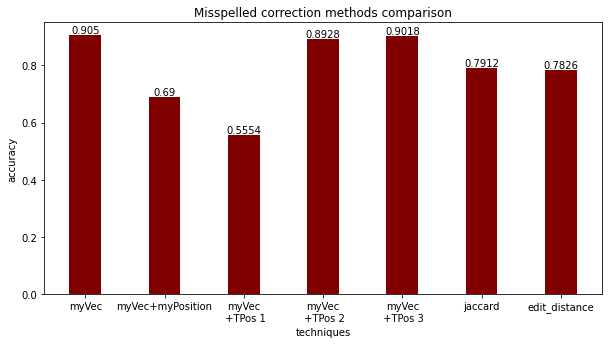

In [21]:
accuracies = [0.905 ,0.69, 0.5554 ,0.8928,0.9018, 0.7912, 0.7826]
techniques = ["myVec", "myVec+myPosition","myVec\n +TPos 1","myVec\n +TPos 2","myVec\n +TPos 3","jaccard","edit_distance"]
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
b = plt.bar(techniques, accuracies, color ='maroon',
        width = 0.4)
plt.bar_label(b)
plt.xlabel("techniques")
plt.ylabel("accuracy")
plt.title("Misspelled correction methods comparison")
plt.show()
